# ASSIGNMENT 2 
#### CITS5508 Machine Learning,  Callum Brown (22985036)



# Section 1 - Breast Cancer Wisconsin Dataset

### 1. loading the breast cancer data
We load the data from one of sklearns preprovided datasets, splitting it into feature and target dataframes and confirming their sizes match up. 

In [ ]:
%matplotlib inline
import sklearn.datasets
import pandas as pd
import numpy as np

# obtain the dataset in the form (data, target)
breast_cancer = sklearn.datasets.load_breast_cancer(as_frame=True)

# the feature dataframe
x = breast_cancer.data

# the target dataframe
y = breast_cancer.target

# get the sizes of the feature matrix and target vectors
print("size of the feature matrix: {} rows x {} columns".format(len(x), len(x.columns)))
print("size of the target vector: {} entries".format(len(y)))

### 2. Feature Investigation
Investigating the data to find features exhibiting linear (high) correlation with another feature will allow us to remove these features, reducing the amount of irrelevant data for use in a regression model. Reducing the amount of irrelevant data will reduce the probability of overfitting, improve the interpretability of the data, and increase model performance, as there is less irrelevant data and noise to be processed by the coming algorithms. 

We generate a quick heatmap to visualise the correlations between the feature variables.

The function 'drop_linearity' searches through a correlation matrix and makes a list of the features with a correlation value above 0.9, our threshold value for deeming a correlation too close to being 'linear'. We drop the features from this list, leaving only the important features for regression. 10 features are dropped: 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'worst texture', 'mean concave points', 'perimeter error', 'area error', 'mean concave points'.  

Another heatmap shows the values with high correlations have been removed. 

Seperating the data into feature and target variables, we perform some quick scatter plots of some random features and their relationship with another random feature, showing that there is generally decent seperation between values associated with the two classes ('benign' tumours and 'malignant' tumours), meaning the regression model should, in theory, work well. 

Finally, we split the cleaned data into training and target datasets in an 85/15 ratio using a random_state value of 123, and fit a standard scaler to the training feature data to scale both the training and testing feature data. Fitting the scaler to just the training data prevents data leakage from the testing data into the training data.

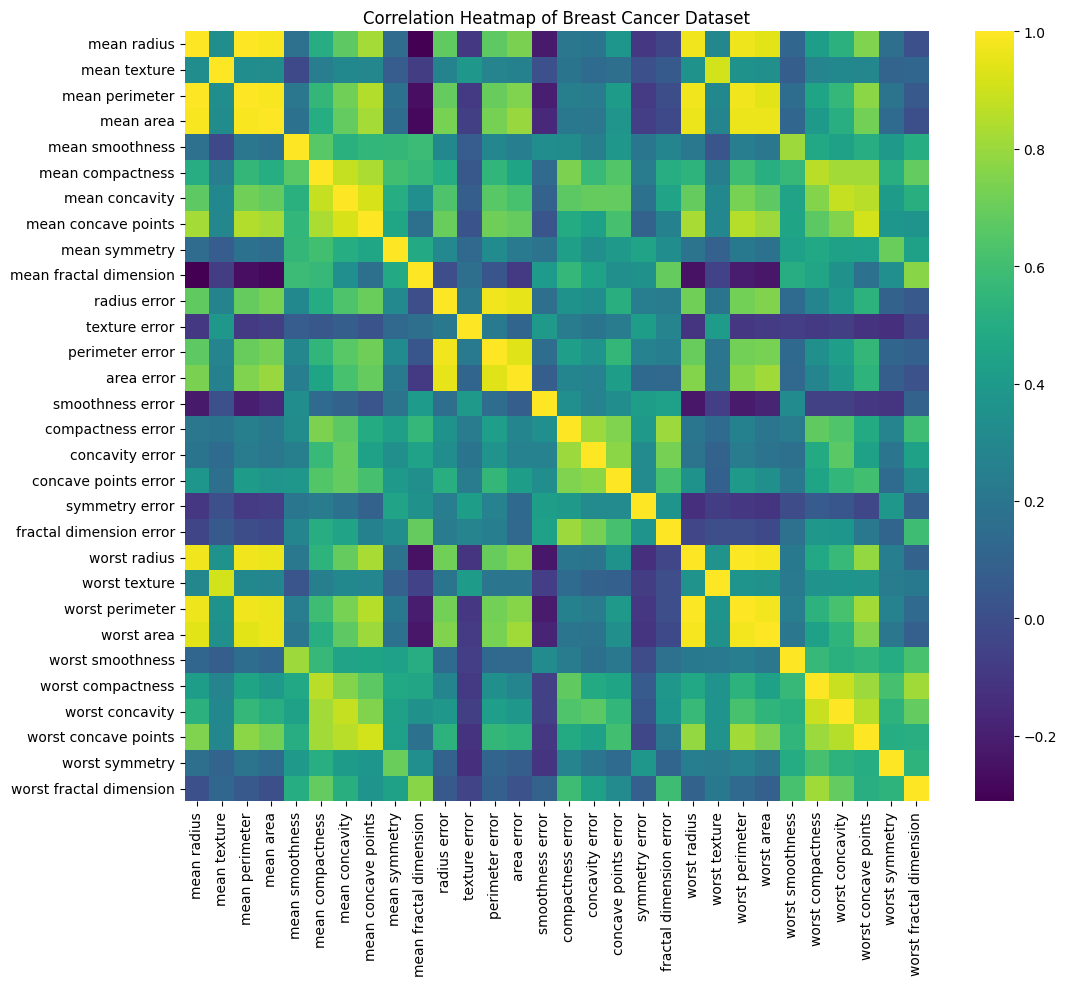

The features with a correlation value >0.9, to be removed from the dataset:

['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'worst texture', 'mean concave points', 'perimeter error', 'area error', 'mean concave points']

Removing 10 features from the dataset


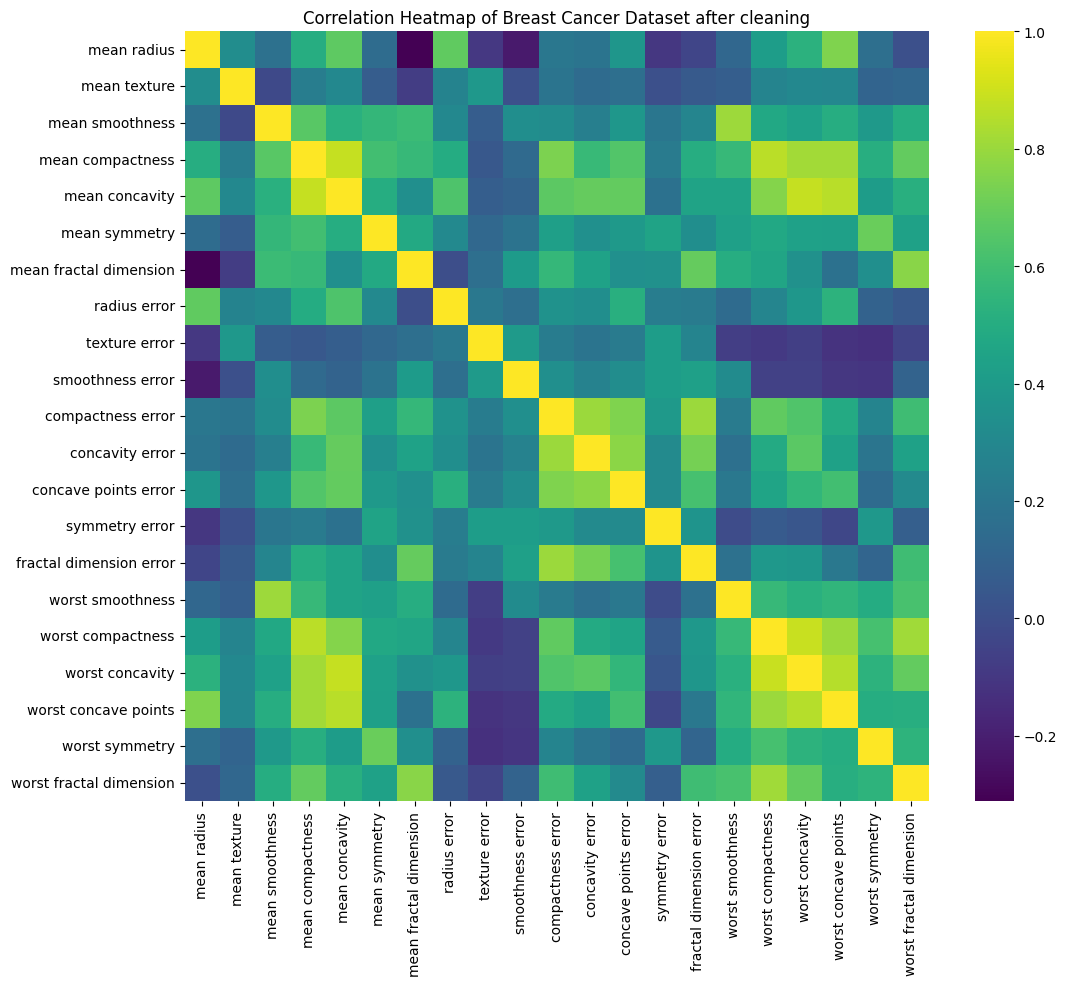

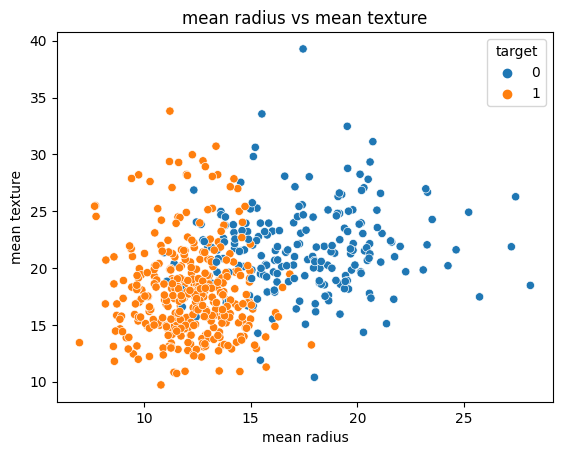

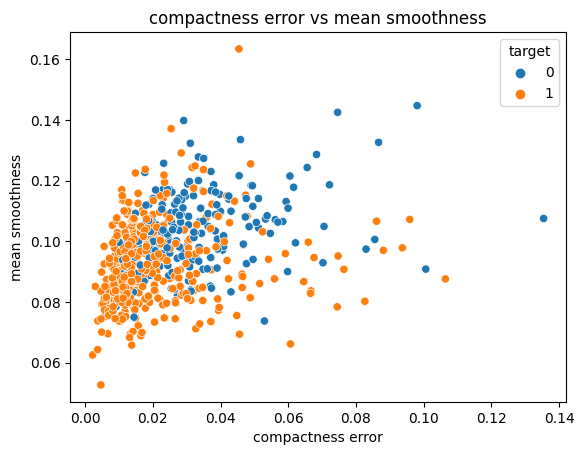

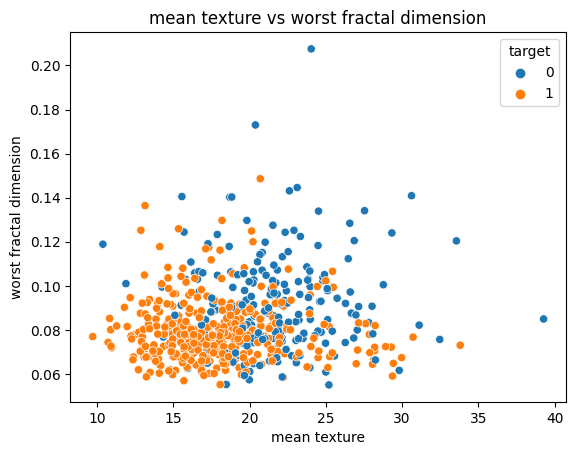

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a correlation matrix
corr_matrix = x.corr()

# Create a heatmap, increasing the size so that all values are included
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='viridis')
plt.title("Correlation Heatmap of Breast Cancer Dataset")
plt.show()

# Using some maths and the correlation matrix to remove the linearly correlated features
# written as a function for use in the coming datasets
def drop_linearity(data, threshold):
    linear_features = []
    for row in data:
        if row in linear_features:
            continue
        for column in data:
            if row == column: 
               continue
            if data.at[row, column] > threshold or data.at[row, column] < -threshold:
                linear_features.append(column)
    return linear_features

# calling the above function to get a list of the linearly correlated values
lf = drop_linearity(corr_matrix, 0.9)
print("The features with a correlation value >0.9, to be removed from the dataset:\n")
print(lf)
print("\nRemoving {} features from the dataset".format(len(lf)))
# dropping the features in the generated list
x = x.drop(lf, axis=1)

# create a new correlation matrix 
corr_matrix = x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='viridis')
plt.title("Correlation Heatmap of Breast Cancer Dataset after cleaning")
plt.show()

# combine the features and target into a single dataframe
bc = x.copy()
bc['target'] = y

# Create scatter plots for each pair of features with target variable as hue
sns.scatterplot(data=bc, x='mean radius', y='mean texture', hue='target', palette='tab10')
plt.title('mean radius vs mean texture')
plt.show()

sns.scatterplot(data=bc, x='compactness error', y='mean smoothness', hue='target', palette='tab10')
plt.title('compactness error vs mean smoothness')
plt.show()

sns.scatterplot(data=bc, x='mean texture', y='worst fractal dimension', hue='target', palette='tab10')
plt.title('mean texture vs worst fractal dimension')
plt.show()

# splitting the data into testing and training data
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.15, random_state=123)

# initialise a scaler for the data
scaler = StandardScaler()

# fitting to the training data and scaling the training and testing feature data
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

### 3.1 Training a Decision Tree with Default Hyperparameters


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# initialise the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=123)

# train the dtc
dt_clf.fit(x_tr, y_tr)

DecisionTreeClassifier(random_state=123)

### 3.2 Performing Predictions with the Decision Tree

In [4]:
from sklearn.metrics import precision_recall_curve

# predict classification on the test set and training set as in the handout 
dt_y_pred_te = dt_clf.predict(x_te)
dt_y_pred_tr = dt_clf.predict(x_tr)

# calculate accuracy scores
dt_acc_te = accuracy_score(y_te, dt_y_pred_te)
dt_acc_tr = accuracy_score(y_tr, dt_y_pred_tr)

# obtain confusion matrices for later comparison
dt_cm_te = confusion_matrix(y_te, dt_y_pred_te)
dt_cm_tr = confusion_matrix(y_tr, dt_y_pred_tr)

# get the precision recall curve for the testing and training sets for later comparison
pte, rte, tte = precision_recall_curve(y_te, dt_y_pred_te)
ptr, rtr, ttr = precision_recall_curve(y_tr, dt_y_pred_tr)

print("Comparing accuracy scores of the decision tree classifier:\n")
print("Accuracy on the training set: {:.6f}".format(dt_acc_tr))
print("Accuracy on the test set: {:.6f}\n".format(dt_acc_te))
print("A Difference of {:.2f}%\n".format(100*(dt_acc_tr-dt_acc_te)/dt_acc_te))

# quick function to print confusion matrix values
def output_confusion_matrix(cm):
    print("True Positives: {} False Positives: {} True Negatives: {}, False Negatives {}".format(cm[0][0], cm[0][1], cm[1][1], cm[1][0]))

# printing the size of the training and testing datasets, which may help in diagonising the occurance of overfitting
print("The training data is {} rows in size, the testing data is {} rows in size".format(len(x_tr), len(x_te)))
# printing the number of features in the model for use alongside the size of the dataset
print("\nThere are {} features of the breast cancer dataset present in the training data".format(len(bc.columns)))

Comparing accuracy scores of the decision tree classifier:

Accuracy on the training set: 1.000000
Accuracy on the test set: 0.906977

A Difference of 10.26%

The training data is 483 rows in size, the testing data is 86 rows in size

There are 22 features of the breast cancer dataset present in the training data


### 3.3 Exploring Overfitting
From the output of the above code, we can see that the accuracy score of the decision tree classifier is 1.0 or 100%. The accuracy score of the classifier on the testing set is only around 90.7%, substantially lower than the training score with a difference of roughly 10%. This is usually an indicator of overfitting, where the classifier is too closely fitted to the training data, performing perfectly with a score of 100% accuracy, but poorly on the testing data unseen by the classifier. We also store some performance metrics for comparisons to be made later on in the code.

Overfitting can occur for a number of reasons:
1. Where there are too many outliers in the training data.
2. Where there are not enough entries in the training data, not representing the complexity/overall trends of the dataset accurately.

There are 483 entries in the training dataset, and the model makes use of 21 features. 483 entries is a rather small dataset when using 21 features, especially if there are complex interactions between these features. Overfitting is likely occuring here. Generally, as the number of features in a dataset increases, so too should the size of the training dataset in order to avoid overfitting.  

Measures can be taken to reduce overfitting by simplifying the decision tree, such as feature dimension trimming, limiting hyperparameters of the decision tree such as max_depth, min_samples_leaf, and regularisation of the data. 

### 3.4 Displaying the Decision Tree
using code taken from the textbook, we visualise the decision tree model trained and used above, however modified by reducing the maximum depth of the decision tree for visual clarity. EDIT: Returning to this point after having completed the below modules, I have opted to visualise the entire tree as I believe it is interesting to examine the entire default tree before introducing hyperparameters.

The fill colour of the nodes of the tree indicated the dominance of a particular classification - the more blue a node is, the higher percentage of instances classified 'benign' belong to it, while the more orange a node is, the higher percentage of 'malignant' entries it contains. If a node approaches the colour white, it contains an even split of instances belonging to each classification. We can also see that this correlates with the Gini Index, where an even split corresponds to a gini index of 0.5.

We can use the 'gini' value or the Gini Index, ranging from 0 to 0.5, is a measure of impurity used to indicate the quality of a 'split' from parent node to child nodes. It measures the probability of the node incorrectly classifying an entry from the dataset. A high gini index means the split is not informative, having no impact on the classification ability of the decision tree, while a low gini index indicates the split IS informative and improves the classification ability of the tree. 

A gini index of zero would indicate that all the training entries examined by the node were classified correctly, a nod towards overfitting, as the model is too closely fitting to the training data. Examining the tree with no limit to max_depth, we observe all of the leaf nodes (nodes without child nodes) to have a gini index of zero, Meaning all of the instances of the training dataset are correctly classified. Therefore, the figure definitely supports the claim that the above decision tree is overfitting. 

The decision tree model visualised


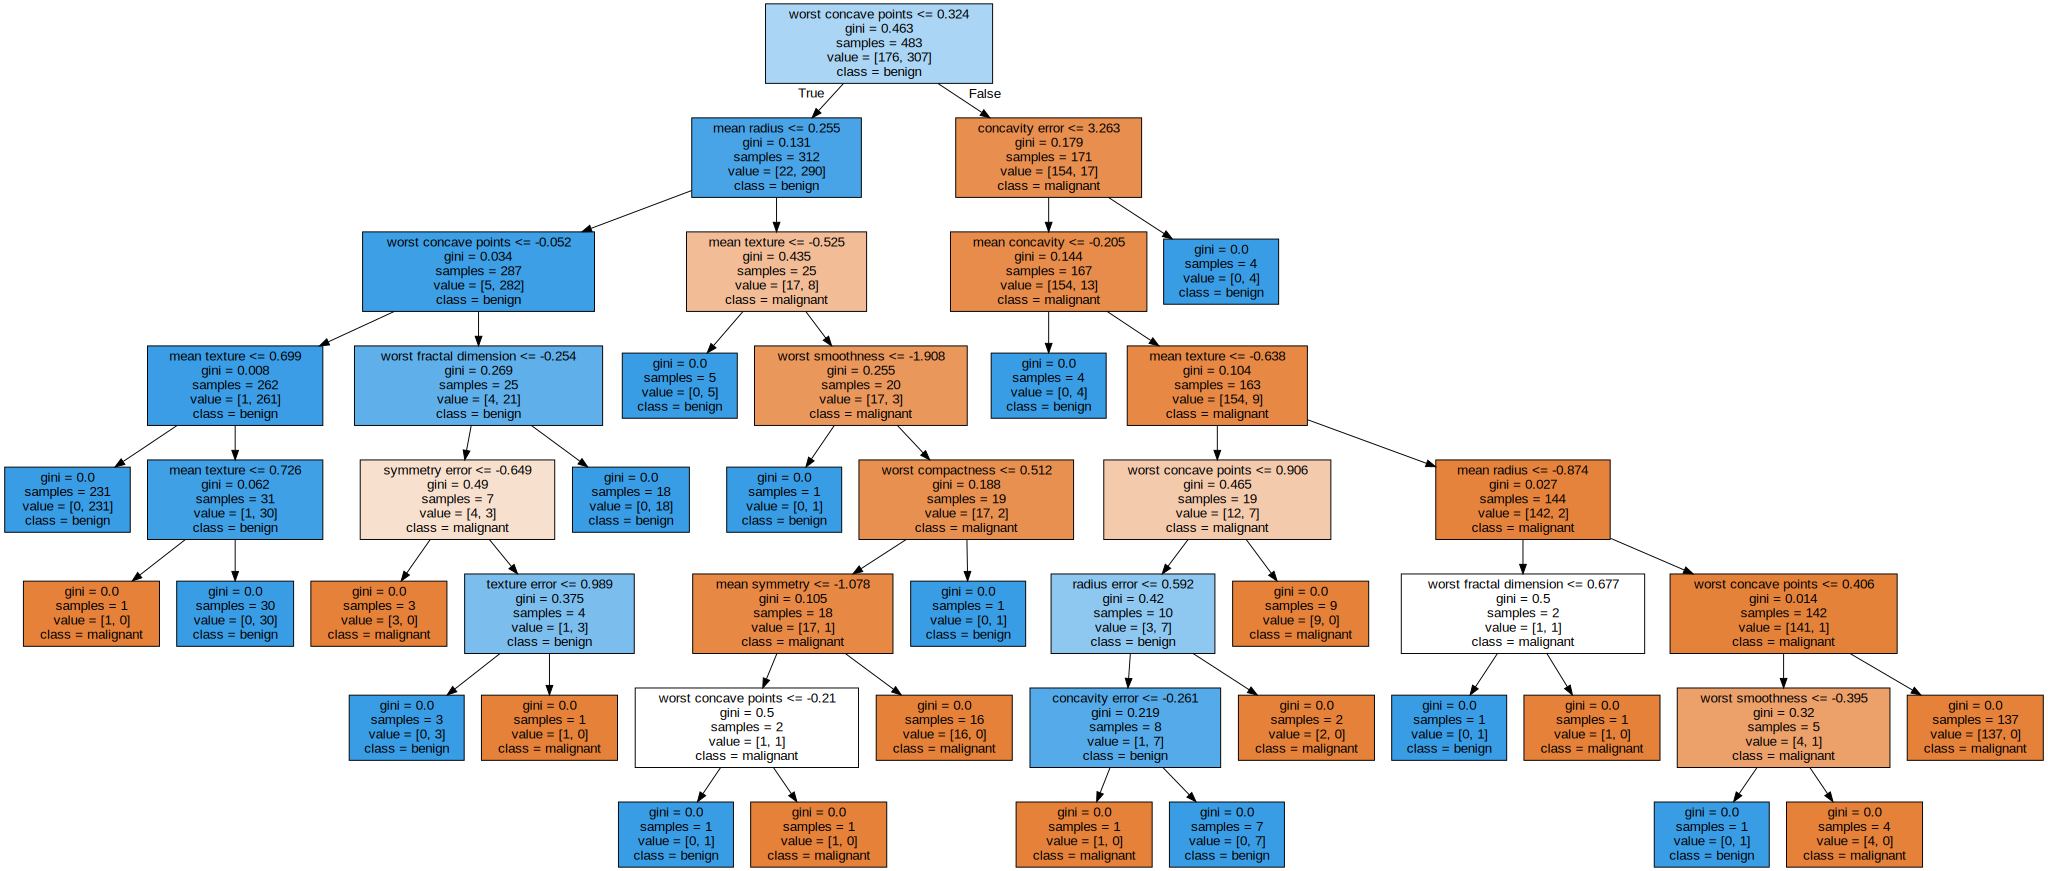

In [5]:
# using code taken from https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb
from graphviz import Source
from sklearn.tree import export_graphviz

# rebuilding the tree with max_depth=3 for visualisation 
# EDIT: removed the max depth to see the whole tree
dt_clf = DecisionTreeClassifier(random_state=123)

# train the dtc
dt_clf.fit(x_tr, y_tr)

export_graphviz(
        dt_clf,
        out_file="p1_tree.dot",
        feature_names=x.columns,
        class_names=breast_cancer.target_names,
        filled=True
    )

print("The decision tree model visualised")
Source.from_file("p1_tree.dot")

### 3.5 Constructing a Second Decision Tree with max_depth=3
Repeating the previous code but for a change to the max_depth hyperparameter, we train another decision tree and obtain accuracy scores, confusion matrices and precision recall curves (which will be examined later on) for the training and testing datasets. The introduction of a maximum depth parameter may help to limit the complexity of the decision tree, working to prevent overfitting.

The accuracy score for the training dataset is no longer 100% but still a solid 96.5%, no longer perfectly fitting to the training dataset, we confirm this as not all leaf nodes of the decision tree have a gini index of zero. The testing set score remains the same as before at around 90.7%. We have reduced the overfitting of the model to the training data, while keeping the accuracy of the model at predicting new data the same. 

From the visualisation of the tree, we can see it is smaller than the default tree, and not all of the leaf nodes have a gini value of zero.

Accuracy scores of the default decision tree classifier:
training set: 1.000000
test set: 0.906977

Accuracy scores of the max depth=3 decision tree classifier:
training set: 0.964803
test set: 0.906977


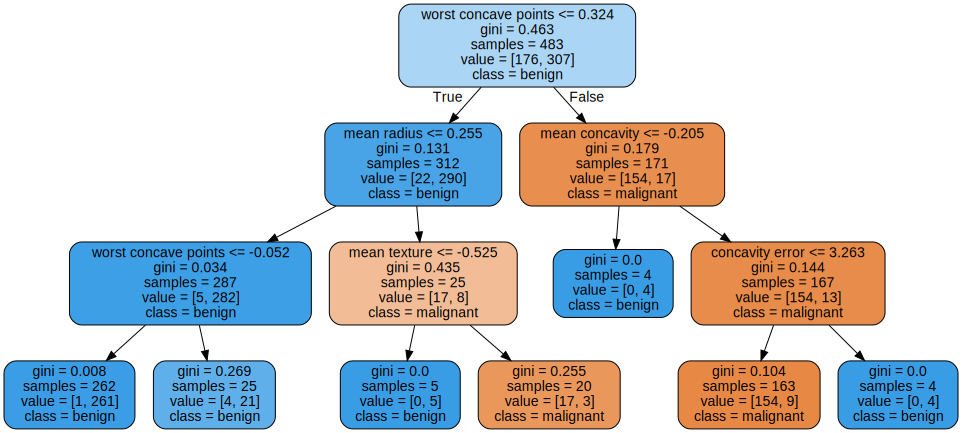

In [6]:
# initialise and fit/train the dtc 
dt_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=123)
dt_clf_d3.fit(x_tr,y_tr)

# predict classification on the test set and training set as in the handout 
dt_d3_y_pred_te = dt_clf_d3.predict(x_te)
dt_d3_y_pred_tr = dt_clf_d3.predict(x_tr)

# calculate accuracy scores
dt_d3_acc_te = accuracy_score(y_te, dt_d3_y_pred_te)
dt_d3_acc_tr = accuracy_score(y_tr, dt_d3_y_pred_tr)

# obtain confusion matrices
dt_d3_cm_te = confusion_matrix(y_te, dt_d3_y_pred_te)
dt_d3_cm_tr = confusion_matrix(y_tr, dt_d3_y_pred_tr)

# get the precision recall curve for the testing and training sets
pd3te, rd3te, td3te = precision_recall_curve(y_te, dt_d3_y_pred_te)
pd3tr, rd3tr, td3tr = precision_recall_curve(y_tr, dt_d3_y_pred_tr)

print("Accuracy scores of the default decision tree classifier:")
print("training set: {:.6f}".format(dt_acc_tr))
print("test set: {:.6f}\n".format(dt_acc_te))
print("Accuracy scores of the max depth=3 decision tree classifier:")
print("training set: {:.6f}".format(dt_d3_acc_tr))
print("test set: {:.6f}".format(dt_d3_acc_te))

export_graphviz(
        dt_clf_d3,
        out_file="p1_d3_tree.dot",
        feature_names=x.columns,
        class_names=breast_cancer.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("p1_d3_tree.dot")

### 3.6 Training a Third Decision Tree with min_samples_split=5
The training accuracy score is approximately 99.4% here, and such the model is probably still exhibiting overfitting, however this score is slightly lower than the original tree's score of 100%, and higher than the max_depth=3 tree's score. The testing accuracy score is slightly higher than the original and the max_depth=3 trees.

With the min_samples_split value set to five, we prevent the tree splitting a node with less than five values, avoiding the tree forming hyper specific relationships between training feature instances which may not be reflected in unseen testing data. This can help prevent overfitting by reducing the noise that may be introduced by these specific splits. The set value could potentially also reduce the overall depth of the tree in some cases.

Comparing this tree with the default tree, we can see it is similar in complexity, but in some cases, nodes have been prevented from splitting within in the tree, marginally reducing the overall complexity of the tree, with a few less nodes than the default decision tree. This results in an ever-so-slightly better generalisation by the model and therefore a marginally improved accuracy score on the testing set, while also marginally decreasing the score on the training set.

I again opted not to limit the size of the tree in visualisation, as I believe seeing the entire tree encourages a stronger understanding of the mechanics of the tree.

Accuracy scores of the default decision tree classifier:
training set: 1.000000
test set: 0.906977

Accuracy scores of the max depth=3 decision tree classifier:
training set: 0.964803
test set: 0.906977

Accuracy scores of the min samples split=5 decision tree classifier:
training set: 0.993789
test set: 0.918605


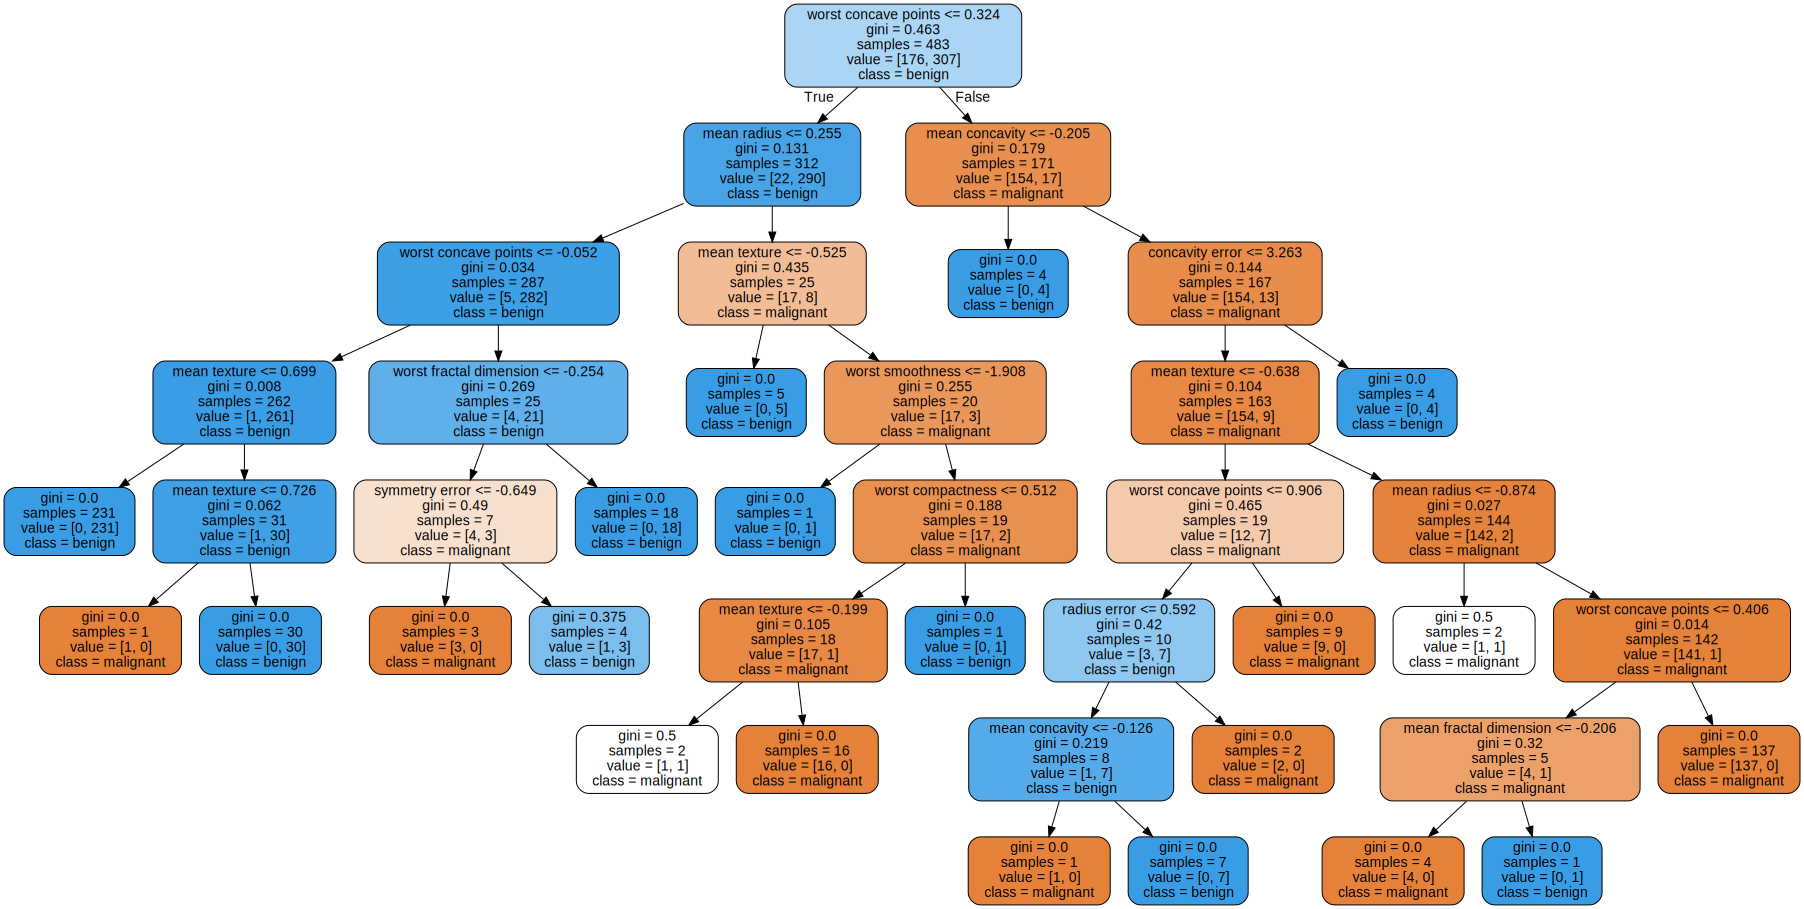

In [7]:
# initialise and fit/train the dtc 
dt_clf_mss5 = DecisionTreeClassifier(min_samples_split=5, random_state=123)
dt_clf_mss5.fit(x_tr,y_tr)

# predict classification on the test set and training set as in the handout 
dt_mss5_y_pred_te = dt_clf_mss5.predict(x_te)
dt_mss5_y_pred_tr = dt_clf_mss5.predict(x_tr)

# calculate accuracy scores
dt_mss5_acc_te = accuracy_score(y_te, dt_mss5_y_pred_te)
dt_mss5_acc_tr = accuracy_score(y_tr, dt_mss5_y_pred_tr)

# obtain confusion matrices
dt_mss5_cm_te = confusion_matrix(y_te, dt_mss5_y_pred_te)
dt_mss5_cm_tr = confusion_matrix(y_tr, dt_mss5_y_pred_tr)

# get the precision recall curve for the testing and training sets
pmsste, rmsste, tfte = precision_recall_curve(y_te, dt_mss5_y_pred_te)
pmsstr, rmsstr, tftr = precision_recall_curve(y_tr, dt_mss5_y_pred_tr)

print("Accuracy scores of the default decision tree classifier:")
print("training set: {:.6f}".format(dt_acc_tr))
print("test set: {:.6f}\n".format(dt_acc_te))
print("Accuracy scores of the max depth=3 decision tree classifier:")
print("training set: {:.6f}".format(dt_d3_acc_tr))
print("test set: {:.6f}\n".format(dt_d3_acc_te))
print("Accuracy scores of the min samples split=5 decision tree classifier:")
print("training set: {:.6f}".format(dt_mss5_acc_tr))
print("test set: {:.6f}".format(dt_mss5_acc_te))

export_graphviz(
        dt_clf_mss5,
        out_file="p1_mss5_tree.dot",
        feature_names=x.columns,
        class_names=breast_cancer.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("p1_mss5_tree.dot")

### 3.7 Training a Fourth Decision Tree with min_samples_leaf=5
Repeating the last few steps, this time with min_samples_leaf set to 5, gives us yet another decision tree. The resulting tree is less complex than the original and the min_samples_split trees, but is more complex than the max_depth=3 tree, judging by the number of nodes in the decision tree. The min_samples_leaf parameter sets a limit to the minimum number of samples a leaf node may contain. This may help prevent overfitting by forcing the tree to create fewer, more generalisable leaf nodes and a less complex overall decision tree.

The accuracy score on the training set is approximately 97.1%, lower than the default and the min_samples_split trees, but higher than the max_depth tree. The accuracy score on the testing set is approximately 95.3%, our best testing accuracy score yet! By reducing the complexity of the tree, we improve the generalisation ability of the model, improving its ability to predict unseen testing data targets, while also reducing the tendency of the model to overfit the training data. 

Accuracy scores of the default decision tree classifier:
training set: 1.000000
test set: 0.906977

Accuracy scores of the max depth=3 decision tree classifier:
training set: 0.964803
test set: 0.906977

Accuracy scores of the min samples split=5 decision tree classifier:
training set: 0.993789
test set: 0.918605

Accuracy scores of the min_samples_leaf=5 decision tree classifier:
training set: 0.971014
test set: 0.953488


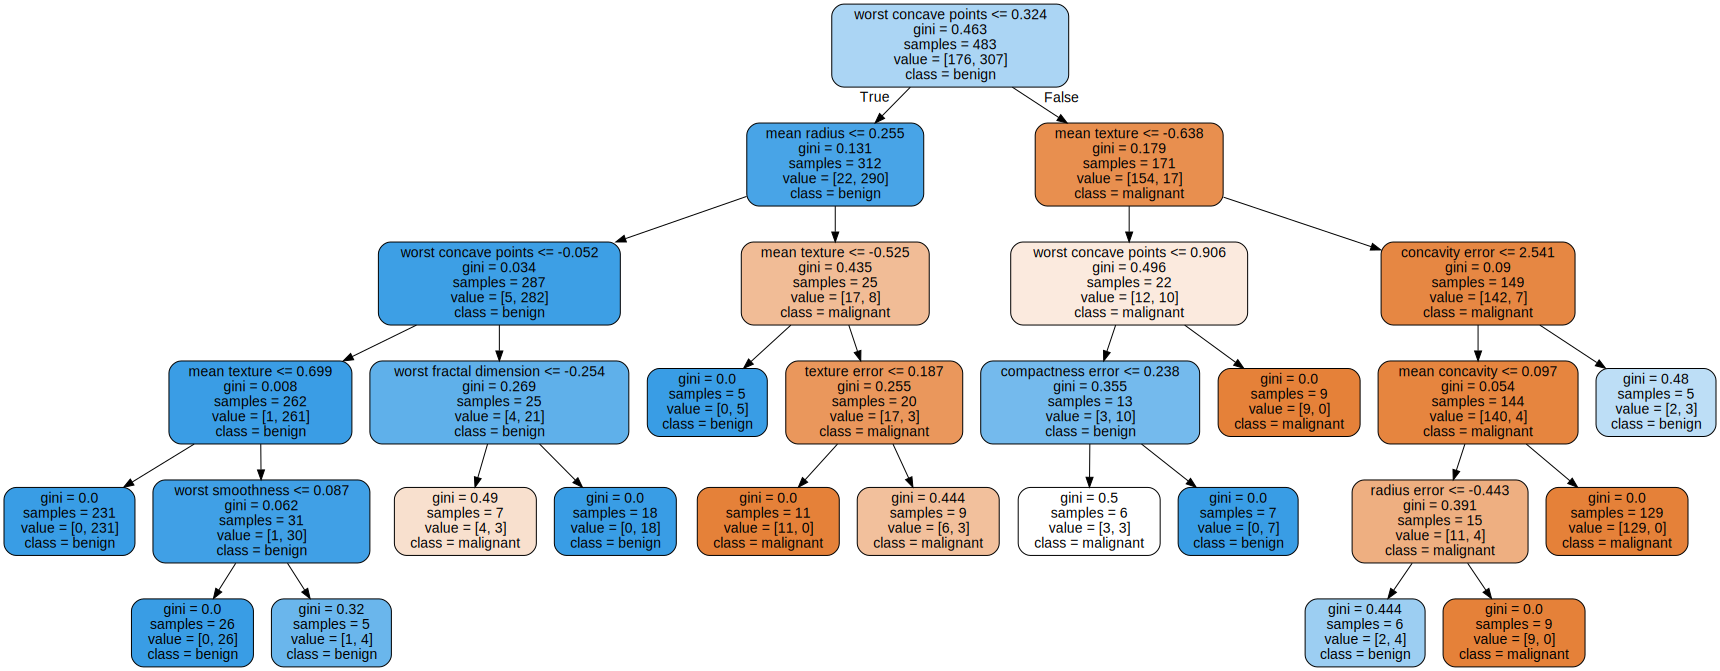

In [8]:
# initialise and fit/train the dtc 
dt_clf_msl5 = DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
dt_clf_msl5.fit(x_tr,y_tr)

# predict classification on the test set and training set as in the handout 
dt_msl5_y_pred_te = dt_clf_msl5.predict(x_te)
dt_msl5_y_pred_tr = dt_clf_msl5.predict(x_tr)

# calculate accuracy scores
dt_msl5_acc_te = accuracy_score(y_te, dt_msl5_y_pred_te)
dt_msl5_acc_tr = accuracy_score(y_tr, dt_msl5_y_pred_tr)

# obtain confusion matrices
dt_msl5_cm_te = confusion_matrix(y_te, dt_msl5_y_pred_te)
dt_msl5_cm_tr = confusion_matrix(y_tr, dt_msl5_y_pred_tr)

# get the precision recall curve for the testing and training sets
pmslte, rmslte, tmslte = precision_recall_curve(y_te, dt_msl5_y_pred_te)
pmsltr, rmsltr, tmsltr = precision_recall_curve(y_tr, dt_msl5_y_pred_tr)

print("Accuracy scores of the default decision tree classifier:")
print("training set: {:.6f}".format(dt_acc_tr))
print("test set: {:.6f}\n".format(dt_acc_te))
print("Accuracy scores of the max depth=3 decision tree classifier:")
print("training set: {:.6f}".format(dt_d3_acc_tr))
print("test set: {:.6f}\n".format(dt_d3_acc_te))
print("Accuracy scores of the min samples split=5 decision tree classifier:")
print("training set: {:.6f}".format(dt_mss5_acc_tr))
print("test set: {:.6f}\n".format(dt_mss5_acc_te))
print("Accuracy scores of the min_samples_leaf=5 decision tree classifier:")
print("training set: {:.6f}".format(dt_msl5_acc_tr))
print("test set: {:.6f}".format(dt_msl5_acc_te))

export_graphviz(
        dt_clf_msl5,
        out_file="p1_msl5_tree.dot",
        feature_names=x.columns,
        class_names=breast_cancer.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("p1_msl5_tree.dot")

### 3.8 Using 3F Cross Validation and Grid Search for Hyperparameter Optimisation
We select a couple of decent values for each of the previous hyperparameters used to train a decision tree model, and use them in a grid search with 3-fold cross validation in order to find the best combination of the values optimising the accuracy of the model. 3-fold cross validation works by splitting the data into three folds, each one used as a testing set. The remaining data is used to train the model three times, evaluating its performance on each fold, and averaging the performance across the three folds. Grid search employs this cross validation technique to test different combinations of values of hyperparameters, performing cross validation on each combination of hyperparameters, of which grid search selects the best performing set.

The max_depth hyperparameter value of 3 is maintained, while min_samples_leaf is best set at 1. This decision tree may not need a minimum limit to how many entries can be on a leaf node. min_samples_split is best set at 2. The lower values performing better here may correlate to the small size of the dataset alongside its many features, and therefore complex nature. To be noted, min_samples_leaf and min_samples_split are set to their default values, the only hyperparameter that varies from its default is max_depth. The maximum depth of the tree being set probably has the greatest impact on the performance of the data in this context, as the default tree extends to a depth of 7 when it is not limited.

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to define some common hyperparameter values for grid search
parameter_grid = {
    'max_depth': [None, 2, 3, 4, 5, 7],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialise a decision tree classifier object
dt_clf_pg = DecisionTreeClassifier(random_state=123)

# Perform a 3-fold cross-validation grid search
grid_search = GridSearchCV(dt_clf_pg, parameter_grid, cv=3)
grid_search.fit(x_tr, y_tr)

# A list of the best parameters
best_params = grid_search.best_params_

# Print the results of the cross-validation grid search
print("Best hyperparameters:", best_params)
print("Cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation accuracy: 0.9358178053830227


### 3.9 Using the Optimal Hyperparameters to Construct a Final Decision Tree Classifier
observing the accuracy of the optimal hyperparameter decision tree classifier (which may not be optimal, just contains the optimal combination in the context of our three hyperparameters), the decision tree exhibits almost exact scores when compared with the max_depth=3 tree. This is due to the optimal max_depth hyperparameter being 3, at which the min_samples_leaf and min_samples_split values are set to their defaults. We are essentially looking at the same tree as generated in part 3.5.

Looking at the confusion matrices alongside these accuracy scores, we can see the min_samples_leaf=5 tree performed the best on the testing set, with the min_samples_split=5 tree following closely, and the remaining trees performing the same classification errors on the testing set, this is deciphered from the number of false positives and false negatives of each tree since all of the trees are predicting the same testing set. For the training set, the best performer is the default tree, as it is overfitted to the training data and is 100% correct in classification. the min_samples_split=5 tree follows closely behind, followed by the min_samples_leaf tree, with the final and max_depth trees in last, performing exactly the same. 

The max_depth and final trees have the exact same precision recall curve for both the training and testing sets. The better a precision recall curve, the more area under the curve of the plot, so we can say the 'best' precision recall curve for the training set is again exhibited by the default decision tree, while the worst is shared by the max_depth and final trees - we see a direct correlation with a worse precision recall curve and a worse accuracy score for the dataset. For the testing data, we see the min_samples_leaf tree performs the best, again with the highest accuracy score for the testing set, and the award for worst performer is shared between the original default tree, the max_depth tree, and the final tree, all sharing the same accuracy score. 

Now, looking at the problem with the context of each entry being a sample of breast tissue. Each entry has been classified either malignant or cancerous, or benign and non cancerous. The features describe the size, shape and texture of cell nuclei of the breast tissue when examined via a digitised image of an FNA (fine needle aspirate) of the breast. The purpose of a classifier would be to diagnose new breast tissue samples based on this image, and therefore, the most important characterisitic of the model is its accuracy while classifying new breast images, which we measure as the model's accuracy at predicting test data.

In [4]:
dt_clf_final = DecisionTreeClassifier(random_state=123, **best_params)
dt_clf_final.fit(x_tr,y_tr)

# predict classification on the test set and training set as in the handout 
f_yp_te = dt_clf_final.predict(x_te)
f_yp_tr = dt_clf_final.predict(x_tr)

# calculate accuracy scores
f_acc_te = accuracy_score(y_te, f_yp_te)
f_acc_tr = accuracy_score(y_tr, f_yp_tr)

# obtain confusion matrices
f_cm_te = confusion_matrix(y_te, f_yp_te)
f_cm_tr = confusion_matrix(y_tr, f_yp_tr)

# get the precision recall curve for the testing and training sets
pfte, rfte, tfte = precision_recall_curve(y_te, f_yp_te)
pftr, rftr, tftr = precision_recall_curve(y_tr, f_yp_tr)

# printing accuracy scores of all of the trees
print("Accuracy scores of the default decision tree classifier:")
print("training set: {:.6f}".format(dt_acc_tr))
print("test set: {:.6f}\n".format(dt_acc_te))
print("Accuracy scores of the max depth=3 decision tree classifier:")
print("training set: {:.6f}".format(dt_d3_acc_tr))
print("test set: {:.6f}\n".format(dt_d3_acc_te))
print("Accuracy scores of the min samples split=5 decision tree classifier:")
print("training set: {:.6f}".format(dt_mss5_acc_tr))
print("test set: {:.6f}\n".format(dt_mss5_acc_te))
print("Accuracy scores of the min_samples_leaf=5 decision tree classifier:")
print("training set: {:.6f}".format(dt_msl5_acc_tr))
print("test set: {:.6f}\n".format(dt_msl5_acc_te))
print("Accuracy scores of the final optimal decision tree classifier:")
print("training set: {:.6f}".format(f_acc_tr))
print("testing set: {:.6f}".format(f_acc_te))

# comparing the confusion matrices 
print("\nConfusion Matrices of the Default Tree:")
print("Testing:")
output_confusion_matrix(dt_cm_te)
print("Training:")
output_confusion_matrix(dt_cm_tr)

print("\nConfusion Matrices of the max_depth=3 Tree:")
print("Testing:")
output_confusion_matrix(dt_d3_cm_te)
print("Training:")
output_confusion_matrix(dt_d3_cm_tr)

print("\nConfusion Matrices of the min_samples_split=5 Tree:")
print("Testing:")
output_confusion_matrix(dt_mss5_cm_te)
print("Training:")
output_confusion_matrix(dt_mss5_cm_tr)

print("\nConfusion Matrices of the min_samples_leaf=5 Tree:")
print("Testing:")
output_confusion_matrix(dt_msl5_cm_te)
print("Training:")
output_confusion_matrix(dt_msl5_cm_tr)

print("\nConfusion Matrices of the Final Tree:")
print("Testing:")
output_confusion_matrix(f_cm_te)
print("Training:")
output_confusion_matrix(f_cm_tr)

# plot precision-recall curve for testing results
plt.figure(figsize=(10,6))
plt.plot(rfte, pfte, label='final')
plt.plot(rd3te, pd3te, label="max_depth=3")
plt.plot(rmsste, pmsste, label="min_samples_split=5")
plt.plot(rmslte, pmslte, label="min_samples_leaf=5")
plt.plot(rte, pte, label='original')
plt.title("Precision Recall Curves of the Decision Trees on the Testing Data")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot precision-recall curve for training results
plt.figure(figsize=(10,6))
plt.plot(rftr, pftr, label='final')
plt.plot(rd3tr, pd3tr, label="max_depth=3")
plt.plot(rmsstr, pmsstr, label="min_samples_split=5")
plt.plot(rmsltr, pmsltr, label="min_samples_leaf=5")
plt.plot(rtr, ptr, label='original')
plt.title("Precision Recall Curves of the Decision Trees on the Training Data")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# visualising the tree to show it is the same as in part3.5
export_graphviz(
        dt_clf_final,
        out_file="final_tree.dot",
        feature_names=x.columns,
        class_names=breast_cancer.target_names,
        rounded=True,
        filled=True,
    )

Source.from_file("final_tree.dot")


NameError: name 'DecisionTreeClassifier' is not defined

# Section 2 - Concrete Slump Test

### 1. Inspect and Clean the data
In our clean_concrete_data function, we first drop the two other output variables from the data; slump and flow, as we will be focusing on the 28-day compressive strength output variable here. We then drop any rows containing null values to reduce noise in the data. Using the function written above in section 1.2 'drop_linearity' we see there are no returned values for highly correlating values, so we do not need to remove any features from the dataset. We generate a heatmap with the correlation matrix to confirm this, none of the features are very closely correlated. We finish by scaling the feature variables with a standard scaler, and the function returns a feature matrix (x_s) and target vector (y). The dataset only contains 103 instances, along with seven features, a relatively small and simple dataset.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning the data for linear regression
def clean_concrete_data(data):

    # dropping the two unrequired target/output columns
    data = data.drop(["SLUMP(cm)", "FLOW(cm)"], axis=1)

    print("There are {} rows in the dataset".format(len(data)))
    
    # drop rows with null values (cleaning missing values)
    data2 = data.dropna()
    print("Dropped {} rows containing null values from the dataset".format(len(data)-len(data2)))
        
    # split the data into feature and target variables
    x = data2.drop("Compressive Strength (28-day)(Mpa)", axis=1)
    y = data2["Compressive Strength (28-day)(Mpa)"]
    
    # using the function from section 1, part 2. drop_linearity to get a list of any feature variables that are closely correlated
    corr_matrix = x.corr()
    linear_features = drop_linearity(corr_matrix, 0.9)
    
    # print the features that are closely correlated >0.9 or -0.9>
    print("Dropped {} features that were too closely correlated in the dataset".format(len(linear_features)))
    
    # drop the linearly correlated features from the dataframe
    x.drop(linear_features)
    
    # generate a correlation matrix
    corr_matrix = x.corr()
          
    # Create a heatmap
    sns.heatmap(corr_matrix, cmap='viridis')
    plt.title("Correlation Heatmap of Concrete Slump Dataset")
    plt.show()
    
    return x, y

# load the data into a dataframe from local source
data = pd.read_csv("slump_test.data")

# calling the above function to clean the concrete data
x, y = clean_concrete_data(data)

FileNotFoundError: [Errno 2] No such file or directory: 'slump_test.data'

### 2. and 3. Training a Voting Regressor with Base Estimators
we split the data into training and testing sets with an 80/20 ratio respectively. We then construct a voting regressor using three base estimators, a linear svm regressor, a default linear regressor, and a stochastic gradient descent regressor. We train each of the base estimators and fit them to the training data, having them predict the testing values before we place them into the voting regressor for comparison later on. We also store their RMSE values for this comparison. After building and training the voting regressor, we print out the RMSE values of each regressor, a lower value indicating a better performance or predictive accuracy of a model. The Stochastic Gradient Descent regressor performs the best, with a RMSE of 3.17, closely followed by our default linear regressor with a score of 3.25. In third place, our voting regressor has a score of 3.39, and finally, the linear SVM model scores 3.95, the worst of the bunch.

We then plot some graphs to illustrate the predictive capability of the four regressors. the first plot is a scatter plot indicating how far each individual predicted target varies from its actual value, a visualisation of the individual error of the models. We then plotted the line of best fit made by these points for each model, and can see that the RMSE values of the models are reflected in how closely the model approximates the actual values. Due to how close the RMSE scores of the linear and SGD regressors are, they appear to be overlapping on the graph. Interestingly, all of the regressors appear to underpredict the target values. 

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# splitting the data 85/15 training and testing.
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=123)

# scaling the feature data after splitting
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

# i) Linear SVM Regressor
svm = LinearSVR()
svm_clf = svm.fit(x_tr, y_tr)

# predict the target values of the testing rows
svm_y_pred = svm_clf.predict(x_te)

# obtain the rmse by comparing the actual target values with the predicted values generated by the SVM model
svm_rmse = np.sqrt(mean_squared_error(y_te, svm_y_pred))

# line of best fit for the predicted targets
svma, svmb = np.polyfit(y_te, svm_y_pred, 1)

# ii) Default Linear Regressor
lr = LinearRegression()
lr_clf = lr.fit(x_tr, y_tr)

# predict the target values of the testing rows
lr_y_pred = lr_clf.predict(x_te)

# obtain the rmse by comparing the predicted and actual target values
lr_rmse = np.sqrt(mean_squared_error(y_te, lr_y_pred))

lra, lrb = np.polyfit(y_te, lr_y_pred, 1)

# iii) Stochastic Gradient Descent Regressor
sgd = SGDRegressor()
sgd_clf = sgd.fit(x_tr, y_tr)

# predict the target values of the testing rows
sgd_y_pred = sgd_clf.predict(x_te)

# obtain the rmse by comparing the predicted and actual target values
sgd_rmse = np.sqrt(mean_squared_error(y_te, sgd_y_pred))

sgda, sgdb = np.polyfit(y_te, sgd_y_pred, 1)

# iv) Voting Regressor 
# creating a voting regressor utilising the previously trained models as base estimators
voting_reg = VotingRegressor(
    estimators = [
        ('svm', svm_clf),
        ('lr', lr_clf),
        ('sgd', sgd_clf)
    ]
)

# training the voting regressor with the training data
voting_reg_clf = voting_reg.fit(x_tr, y_tr)

# predicting the target variables of the test set using the classifier
voting_y_pred = voting_reg_clf.predict(x_te)

# obtain the rmse by comparing the predicted and actual target values
voting_rmse = np.sqrt(mean_squared_error(y_te, voting_y_pred))

va, vb = np.polyfit(y_te, voting_y_pred, 1)

# printing the RMSE values of the different regressors
print("SVM RMSE: {:.6f}".format(svm_rmse))
print("Linear RMSE: {:.6f}".format(lr_rmse))
print("SGD RMSE: {:.6f}".format(sgd_rmse))
print("Voting RMSE: {:.6f}".format(voting_rmse))

# visualise the comparison between actual and predicted target value in the testing set
plt.figure(figsize=(8,8))
plt.scatter(y_te, svm_y_pred, s=15, label="SVM")
plt.scatter(y_te, lr_y_pred, s=15, color="magenta", label="Default Linear")
plt.scatter(y_te, sgd_y_pred, s=15, label="SGD")
plt.scatter(y_te, voting_y_pred, s=15, label="Voting")
plt.plot([15, 47], [15, 47], '--k', label="Actual")
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Target Values')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(y_te, svma*y_te+svmb, label="SVM")
plt.plot(y_te, lra*y_te+lrb, label="Default Linear")
plt.plot(y_te, sgda*y_te+sgdb, label="SGD")
plt.plot(y_te, va*y_te+vb, label="Voting")
plt.plot([15, 47], [15, 47], '--k', label="Actual")
plt.legend()
plt.grid()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Line of Best fit generated by predicted target values')
plt.show()


### 4. Individually Tuning Base Estimator Hyperparameters using Grid Search
Setting hyperparameter values for the linear SVM regressor greatly improved the accuracy of the model, from an earlier RMSE score of approximately 3.95 down to 3.44. The Linear Regressor doesn't have many functional hyperparameters, and so the RMSE value remains similar to its previous counterpart. The RMSE of the SGD Regressor is also generally improved from 3.20 down to 3.18 (these values are approximate and can change). There appears to be a compromise between the number of hyperparameters to be tested and the overall improvement of the model, as taking out the 'learning_rate' parameters from the grid improved the model performance.

Finally, using these 'optimised' regressors as base estimators of the voting regressor, the performance appears to be marginally better than the original voting regressor, though this difference is very small. Improving the accuracy of the base estimators will usually improve the performance of a voting regressor.

We saw before in section2.3 with the visualisation, the SGD and Linear Regressors were almost fully overlapping on the second figure. Further optimising these regressors will have made them even more similar, as the SVM regressor approaches the performance of the other two regressors. If the base estimators of a voting regressor are too similar, making predictions too similar to each other, combining them through a voting regressor may not yield any improvement. This could indicate why the improvement is so small.

From the graph below we can see the four regressors are so close together in their predictions that they nearly all overlap one another. The voting regressor does not get much additional benefit from these base estimators. 

In [ ]:
# i) the SVM regressor
#defining a parameter grid
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    # not included here: tol, loss, max_iter
}

# Initialize Random Forest regressor, max_iter to remove warnings
svr2 = LinearSVR(random_state=123, max_iter=10000)

# Initialise a GridSearch object
svm_gs = GridSearchCV(estimator=svr2, param_grid=svm_param_grid, cv=3)

# Fit the GridSearchCV object to the training data
svm_gs.fit(x_tr, y_tr)

# Get the best hyperparameters and the best model
svm_best_params = svm_gs.best_params_
svm_best_model = svm_gs.best_estimator_

# generate RMSE values for the best model
svm_y_p = svm_best_model.predict(x_te)
svm_rmse = np.sqrt(mean_squared_error(y_te, svm_y_p))

print("Hyperparameters for Linear SVM Regression:", svm_best_params)
print("Linear SVM RMSE: {:.6f}\n".format(svm_rmse))

# ii) Linear Regressor
lr_param_grid = {
    'fit_intercept': [True, False],
    # not included here: copy_X, n_jobs, positive as they don't have an effect on model performance here
    }

lr2 = LinearRegression()
lr_gs = GridSearchCV(estimator=lr2, param_grid=lr_param_grid, cv=3)
lr_gs.fit(x_tr, y_tr)
lr_best_params = lr_gs.best_params_
lr_best_model = lr_gs.best_estimator_
lr_y_p = lr_best_model.predict(x_te)
lr_rmse = np.sqrt(mean_squared_error(y_te, lr_y_p))

print("Hyperparameters for Linear Regression:", lr_best_params)
print("Linear Regressor RMSE: {:.6f}\n".format(lr_rmse))

# iii) Stochastic Gradient Descent Regressor
sgd_param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['elasticnet', 'l2', 'l1'],
    'alpha': [0.1, 0.2, 0.5],
    #'learning_rate': ['constant', 'adaptive'], removed as it improved the RMSE without this hyperparameter set
    # sgd regression has many options for hyperparameter tuning, chose the most interesting and best RMSE output
    }

sgd2 = SGDRegressor(max_iter=10000)
sgd_gs = GridSearchCV(estimator=sgd2, param_grid=sgd_param_grid, cv=3)
sgd_gs.fit(x_tr, y_tr)
sgd_best_params = sgd_gs.best_params_
sgd_best_model = sgd_gs.best_estimator_
sgd_y_p = sgd_best_model.predict(x_te)
sgd_rmse = np.sqrt(mean_squared_error(y_te, sgd_y_p))

print("Hyperparameters for SGD Regression:", sgd_best_params)
print("SGD Regressor RMSE: {:.6f}\n".format(sgd_rmse))

# iv) Voting Regressor 
# creating a voting regressor utilising the previously trained models as base estimators
voting_reg2 = VotingRegressor(
    estimators = [
        ('svm', svr2),
        ('lr', lr2),
        ('sgd', sgd2)
    ]
)

# training the voting regressor with the training data
voting_reg2_clf = voting_reg2.fit(x_tr, y_tr)

# predicting the target variables of the test set using the classifier
voting_y_pred = voting_reg2_clf.predict(x_te)

# obtain the rmse by comparing the predicted and actual target values
voting_rmse = np.sqrt(mean_squared_error(y_te, voting_y_pred))

print("The resulting RMSE of the Voting Regressor: {:.6f}".format(voting_rmse))

# plotting the line of best fit of each regressor again
svma, svmb = np.polyfit(y_te, svm_y_p, 1)
lra, lrb = np.polyfit(y_te, lr_y_p, 1)
sgda, sgdb = np.polyfit(y_te, sgd_y_p, 1)
va, vb = np.polyfit(y_te, voting_y_pred, 1)

plt.figure(figsize=(8,8))
plt.plot(y_te, svma*y_te+svmb, label="SVM")
plt.plot(y_te, lra*y_te+lrb, label="Default Linear")
plt.plot(y_te, sgda*y_te+sgdb, label="SGD")
plt.plot(y_te, va*y_te+vb, label="Voting")
plt.plot([15, 47], [15, 47], '--k', label="Actual")
plt.legend()
plt.grid()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Line of Best fit generated by predicted target values')
plt.show()

# Section 3 - Abalone Dataset
### 1. Data Reading, Inspection and Cleaning
After first inspecting the data we identify the column names are float values, which may lead to confusion later on, and such we replace these column names with the traits they represent, using the webpage provided detailing these features: https://archive.ics.uci.edu/ml/datasets/Abalone

We then use sklearn's LabelEncoder function to convert the character 'Gender' values into integers for use in the coming algorithms. By keeping this feature, we hope to generate a more precise model than if we took the easy route and just removed it from the dataset. 

Plotting of a correlation heatmap, we identify the linearity of the relationships between each feature. From the heatmap, we can see the length and diameter features are linearly correlated, so we drop this feature. the enumerated gender column has very little correlation to the other values. This could be due to the enumeration being performed incorrectly, or the fact that there is no real physical patterns or trends associated with the gender of an Abalone. We can also see that 'Height' has less correlation to the other features. We also observe that each of the feature variables are quite highly correlated. This may prove to be a problem later on, which we will mitigate with feature dimension trimming. I opted not to use the drop_linearity function from above here as all of the features seem to be closely correlated.

Finally, we split the data into feature and target sets, and again into training and testing sets in an 85/15 ratio respectively.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# reading the local file into a dataframe
abalone = pd.read_csv("abalone.data")

print("A quick check that the dataframe looks correct:\n")
print(abalone.head())

# converting the column names 
col_names = ['Gender', 
             'Length', 
             'Diameter', 
             'Height', 
             'Whole Weight', 
             'Shucked Weight', 
             'Viscera Weight', 
             'Shell Weight',
             'Rings'] # where Age = Rings + 1.5, our target variable

# applying the column names to the dataframe
abalone.columns = col_names

print("\nAfter changing the column names to make the dataframe easier to understand:\n")
print(abalone.head())

# initialising a label encoder object for converting char column to integer
le = LabelEncoder()

# fitting the encoder object to the 'Gender' column 
# male = 2, female = 0, infantile = 1
abalone['Gender'] = le.fit_transform(abalone['Gender'])

print("\nAfter using the LabelEncoder object to change the 'Gender' column from character to integer values:")
print("M = 2, F = 0, I = 1; where M is Male, F is Female, and I is infantile.\n")
print(abalone.head())

# get the number of rows in the dataframe before cleaning 
preclean_rowcount = len(abalone)

# some data cleaning
abalone = abalone.dropna()
print("\nThe dropna() function removed {} rows.".format(preclean_rowcount - len(abalone)))

# making a copy df, dropping the target column as it is not to be included in a correlation matrix
cor_abalone = abalone.drop("Rings", axis=1)
# generate a correlation matrix for use in a heat map
corr_matrix = cor_abalone.corr()

# use seaborn to generate a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='viridis')
plt.title("Correlation Heatmap of Abalone Feature Variables")
plt.show()

# drop the diameter feature
cor_abalone = cor_abalone.drop("Diameter", axis=1)

# splitting the data into features (x) and target (y) frames
x = cor_abalone.drop("Rings", axis=1)
y = abalone["Rings"]

# splitting the feature and target frames into training and testing sets, using a random state for longevity
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.15, random_state=123)

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

print("Data split into training and testing sets:")
print("Training set size: {}".format(len(x_tr)))
print("Testing set size: {}".format(len(x_te)))

### 2. Training a Decision Tree (max_depth)
Next, we train a decision tree regression using 3-fold cross validation, tuning the max_depth hyperparameter. We define a range of max_depth values to use in the cross validation, selecting the max as 26 after some testing (where the training RMSE ~= 0), leaving the other hyperparameters as their default values. We then make a plot of the training errors, cross validation errors, and test errors as a function of the ranging max_depth values.

Increasing the maximum depth of a decision tree regressor encourages the model to identify more complex relationships between feature variables and the target by observing more potential 'splits' (from parent node to two child nodes) of the data, resulting in a more precise model. However, as the depth of the tree increases, so too does the risk of overfitting, where the training data is fit 'too closely' resulting in the model being too sensitive to the noise in the training data. This yields a model that performs worse when used to predict testing data previously unseen by the model.

We can see from the graph as the maximum depth of the tree increases, the root mean square error for the training data decreases approaching zero, meaning the model fits closer to the training data with an increasing max depth. Concurrently, we see the testing data RMSE values initially decrease, as the depth introduces more complexity, reaching a minimum at max_depth=5. The testing values then begin to increase, as the model begins to overfit the training data, decreasing the accuracy of the model at predicting the testing set. The cross validation RMSE follows a similar shape to the testing RMSE, initially decreasing to max_depth=5, and then increasing and flattening out at around max_depth=17, however is slightly higher than the testing RMSE.

The slightly higher value may correlate to the nature of the computation of the cross validation score. Multiple validation sets containing overlap with the training data are used, which can lead to slight overfitting of the model to the validation data and hence a higher error value, however the difference remains small for all values of max_depth.

When selecting an optimal max_depth value it is important we consider the three types of error. Generally, we aim for the training error to be low, but not too low, showing the model fits the training data well, but isn't overfitting. We also aim for the testing and cross validation errors to be low, and close together, indicating the model is generalising well to new data. In practise, we must find the best relationship between bias or underfitting, and variance or overfitting. Even though the average error is lowest at max_depth=25, We will select max_depth = 6 as it indicates a low testing and cross validation error (not underfitting), while still containing enough training error (not overfitting).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# defining a range of max_depth values to use 
max_depths = range(1,27)

# defining lists to store the errors for each max_depth value
tr_errors = []
cv_errors = []
te_errors = []

# a value for calculating the minimum average error between the three values
avg_errors = []

# for each max_depths value train a decision tree regressor using that value for the hyperparameter
for max_depth in max_depths:
    # initialise the regressor object
    dtr = DecisionTreeRegressor(max_depth=max_depth)
    # perform 3-fold cross-validation to get the mean squared error
    cv_scores = cross_val_score(dtr, x_tr, y_tr, cv=3, scoring='neg_mean_squared_error')
    # append the CV RMSE to the list
    cve = np.sqrt(-np.mean(cv_scores))
    cv_errors.append(cve)
    # fitting the data to the training model
    dtr.fit(x_tr, y_tr)
    # predict the values of the testing and training sets
    y_tr_p = dtr.predict(x_tr)
    y_te_p = dtr.predict(x_te)
    # obtain the RMSE using the sqrt and mean_squared_error functions, adding them to their corresponding place in the list
    tre = np.sqrt(mean_squared_error(y_tr, y_tr_p))
    tee = np.sqrt(mean_squared_error(y_te, y_te_p))
    tr_errors.append(tre)
    te_errors.append(tee)
    # get the average error of the min_samples_leaf value
    avg_errors.append((cve + tre + tee) / 3)

print("The minimum average error for max_depth is obtained at max_depth = {}".format(avg_errors.index(min(avg_errors))))
# plot the RMSE values as a function of max_depth
plt.figure(figsize=(10,6))
plt.plot(max_depths, tr_errors, label='Training error')
plt.plot(max_depths, cv_errors, label='Cross-validation error')
plt.plot(max_depths, te_errors, label='Test error')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.ylabel('Root Mean Squared Error')
plt.title("Root Mean Squared Errors as a function of Max Depth")
plt.grid()
plt.legend()
plt.show()


### 3. Training a Second Decision Tree (min_samples_leaf)
We now train a second decision tree regression keeping our optimal 'max_depth' hyperparameter set to six. The focus is now on the 'min_samples_leaf' hyperparameter, which yields different error plots to the previous 'max_depth' parameter exploration.

Increasing min_samples_leaf will reduce the variance, or the the number of leaf nodes in the model, resulting in a less complex tree, preventing overfitting to the training data. This can improve its generalisation of unseen data (performance on the testing set). Doing this will concurrently increase the bias of the model, as the tree may generalise heavily relying less on specific feature variables to make predictions, leading to underfitting. The training error will increase as a result. By removing or increasing the max_depth parameter, we can see this is the case on the graph.

However, if max_depth is already set to a low value (6), the tree is already limited in depth, and increasing min_samples_leaf will not have a significant effect on the errors associated with the model. We only observe very slight changes for each of the values, with cross validation again the highest throughout. The testing error exhibits a less smooth line than the training error, this could be due to its smaller size, and therefore higher sensitivity to outliers. The testing error appears to gradually decrease as the min_samples_leaf value increases, reducing the likelihood of overfitting, while the training error gradually increases, as the decision boundary decreases in complexity, and bias increases.

We will select 14 as our min_samples_leaf value allowing us to model the features of the abalone dataset in full complexity, the value reducing bias. Overfitting is already limited by a modest max_depth hyperparameter value.

In [ ]:
# defining a range of min_samples_leaf values to use 
min_samples_leaves = range(1,40)

# defining lists to store the errors for each min_samples_leaf value
tr_errors = []
cv_errors = []
te_errors = []

# a value for calculating the minimum average error between the three values
avg_errors = []

# for each min_samples_leaf value train a decision tree regressor using that value for the hyperparameter
for min_samples_leaf in min_samples_leaves:
    # initialise the regressor object, using the optimal max depth value, and a value from the min_samples_leaves range
    dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf)
    # perform 3-fold cross-validation to get the mean squared error
    cv_scores = cross_val_score(dtr, x_tr, y_tr, cv=3, scoring='neg_mean_squared_error')
    # append the CV RMSE to the list
    cve = np.sqrt(-np.mean(cv_scores))
    cv_errors.append(cve)
    # fitting the data to the training model
    dtr.fit(x_tr, y_tr)
    # predict the values of the testing and training sets
    y_tr_p = dtr.predict(x_tr)
    y_te_p = dtr.predict(x_te)
    # obtain the RMSE using the sqrt and mean_squared_error functions, adding them to their corresponding place in the list
    tre = np.sqrt(mean_squared_error(y_tr, y_tr_p))
    tee = np.sqrt(mean_squared_error(y_te, y_te_p))
    tr_errors.append(tre)
    te_errors.append(tee)
    # get the average error of the min_samples_leaf value
    avg_errors.append((cve + tre + tee) / 3)

print("The minimum average error for min_samples_leaf is obtained at min_samples_leaf = {}".format(avg_errors.index(min(avg_errors))))
# plot the RMSE values as a function of min_samples_leaf
plt.figure(figsize=(15,8))
plt.plot(min_samples_leaves, tr_errors, label='Training error')
plt.plot(min_samples_leaves, cv_errors, label='Cross-validation error')
plt.plot(min_samples_leaves, te_errors, label='Test error')
plt.xlabel('Min Samples Leaf')
plt.xticks(min_samples_leaves)
plt.ylabel('Root Mean Squared Error')
plt.title("Root Mean Squared Errors as a function of Min Samples Leaf")
plt.legend()
plt.show()

### 4. Implementing a Random Forest Regressor
We now implement a random forest regressor with 500 estimators, using our previously selected hyperparameters (max_depth=5, min_samples_leaf=14). We manually experiment with the other hyperparameters using a grid search, by defining a parameter grid with our other hyperparameters. Bootstrap is automatically set to true as max_samples cannot be defined with bootstrap set to false. Testing a couple of values for 'max_features' and 'max_samples' left us with the best combination, max_features = 5, and max_samples = 0.5, yielding the RMSE printed below.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# defining a parameter grid
parameter_grid = {
    'max_features': ['sqrt', 'log2', 0.5, 5],
    'max_samples': [0.5, 0.7, 0.9, None],
}

# Initialize Random Forest regressor
rfr= RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_leaf=14, bootstrap=True, random_state=123)

# Creating a GridSearch object
gs = GridSearchCV(estimator=rfr, param_grid=parameter_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gs.fit(x_tr, y_tr)

# Get the best hyperparameters 
best_params = gs.best_params_
print("The best hyperparameter values for the ones that were tested were:", best_params)

# Use the best hyperparameters to fit the random forest regressor to the training data
best_rfr = RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_leaf=4, bootstrap=True, random_state=123,  **best_params)
best_rfr.fit(x_tr, y_tr)

# Make predictions on the test data and calculate the RMSE
y_p = best_rfr.predict(x_te)
# rounding the predicted ring value to the nearest integer
y_p = np.round(y_p)
rmse = np.sqrt(mean_squared_error(y_te, y_p))
print('Final RMSE using the best parameters: {:.6f}'.format(rmse))

### 5. Feature Importances and Dimension Trimming
Using the feature importances obtained from the training process, we will now trim the feature dimension of the data, removing values less than or equal to 0.05. using our 'best' model from part 4, we find the features with an importance less than or equal to 5% are 'Gender' and, 'Length'. These features (especially gender) probably have a low correlation with the target variable, or high correlation with other features in the set, resulting in their low importance value. Using the SelectFromModel function from feature_selection, with a threshold of 0.05 these columns are removed. We then transform the training and testing sets to no longer contain these features. 

The total remaining importance is then calculated using the get_support() function which returns true or false values depending on whether or not a feature is retained. Approximately 95.2% of the feature dimension remains with the two 'unimportant' features removed from the datasets.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Get the feature importances
feature_importances = best_rfr.feature_importances_

# print the abalone dataset features with their corresponding feature importances
i = 0
print("Feature Importances of the abalone dataset, X marking their required removal\n")
for x in cor_abalone.columns:
    if feature_importances[i] <= 0.05:
        print("{}: {:.6f}  X".format(x, feature_importances[i]))
    else:
        print("{}: {:.6f}".format(x, feature_importances[i]))
    i+= 1
    
# Use SelectFromModel to remove features whose importance values are less than or equal to 5%
sfm = SelectFromModel(best_rfr, threshold=0.05)
sfm.fit(x_tr, y_tr)

# Transform the training and testing data to retain only the selected features
x_tr_s = sfm.transform(x_tr)
x_te_s = sfm.transform(x_te)

# Calculate the remaining feature importance without the unimportant columns
total_importance = sum(feature_importances[sfm.get_support()])
print("\nTotal feature importance value retained: {:.5f} or {:.3f}%".format(total_importance, total_importance*100))
#print("Test feature dimension trimmed by {} entries".format(len(x_te)-len(x_te_s)))

### 6. Re-training with Reduced Feature Dimensional Data
We repeat the training and prediction processes using the data now that it has a reduced feature dimension. The three removed features accounted for roughly 4.2% of the total feature dimension, so their removal is expected to have a relatively small effect on the model's RMSE score. The increase in RMSE is approximately 0.77%.

In [ ]:
# fit the regressor to the reduced dimensional feature data
best_rfr.fit(x_tr_s, y_tr)

# Make predictions on the reduced dimensional test data and calculate the RMSE
y_p_t = best_rfr.predict(x_te_s)
# rounding the predicted ring value to the nearest integer
y_p_t = np.round(y_p_t)
rmse_trimmed = np.sqrt(mean_squared_error(y_te, y_p_t))

print('RMSE of the trimmed feature dimension model: {:.6f}'.format(rmse_trimmed))
print('RMSE of the original model: {:.6f}'.format(rmse))
# calculating the increase between the rmse of the trimmed vs original model
print('RMSE increase from the trim: {:.6f} or {:.3f}%'.format(rmse_trimmed-rmse, 100*(rmse_trimmed-rmse)/rmse))

### 7. Average Prediction Error for each Target Value
We compare the performance of the two regressors; the original, and the regressor with trimmed features in the above code. We observe the RMSE value for the trimmed regressor is slightly higher (0.77%) than the original, due to there being less data for the model to analyse and detect patterns within.

We then determine the average prediction error for each target (ring) value within the testing dataset. Here we are using the predicted values generated by the original model, as we know the original model performs better than the trimmed one. Starting by constructing a new dataframe containing just the target and predicted target values from the testing set, we loop through these entries to perform summations to calculate the average predicted value for each target value. From the average predicted value, we can calculate the percentage error of the prediction. The number of entries of each target is counted alongside this, for use in illustration later on. 

Firstly, we graph the average prediction value for each target, and see that it overestimates the actual target value until around approximately Rings=10, where the prediction error is lowest. Then, the prediction value begins to drop off, underpredicting the target value less and less accurately as Rings approaches 22, the max in this dataset. 

We then graph the average prediction error for each of the target values, along with a bar chart containing the number of entries for each target value in the dataset. We observe the prediction error begins at around 66% at Rings=3, as there is only one instance of a ring value of 3. following a rough shallow concave up parabolic curve which bottoms out just above 0% at Rings=11. The value then begins to increase again returning to around 35% error at Rings=21, and dropping again to 32% at Rings=22. 

Now, looking at the number of entries at each target value, we can see the average prediction error must be roughly inversely proportional to the number of entries. A low number of entries correlates to a higher prediction error, and vice versa. We could say 'a large prediction error for a ring value IS related to insufficient training instances for that ring value'. This is due to the model containing proportionately less training data for the lower and higher ring values, as the population appears to be normally distributed. Henceforth, it will be worse at predicting if an entry belongs to that classification based on its feature values. We can also state 'large AND small ring values tend to have LARGER average errors than those values in the middle.' This is again due to the approximately normal distribution of the population, and the fact that the testing data is an accurate representation of the training data. 

In [ ]:
# create a dataframe with target values and predicted target values
df = pd.DataFrame({'target': y_te, 'pred_target': y_p})

# sort the dataframe in order of ring value
df = df.sort_values('target')

# the current target value for the below loop, 4 is selected as it is the initial value in the df
target_value = min(df['target'])
# an array for storing the average predicted value for each target_value
avg_pred_val_rf = []
target_values = []
avg_pred_error = []
counts = []
# running total for summation of the predicted values for each target_value
cur_pred_sum = 0
# a count to divide the summation when all of the values of the target_values have been accessed
count = 0

# loop through the rows of the df containing target and predicted target values
for index, row in df.iterrows():
    # if the target value in this row of the df is equal to the current target_value
    if row['target'] == target_value:
        # add the predicted target value to the sum and count it
        cur_pred_sum += row['pred_target']
        count += 1
    else:
        if count == 1:
            avg_pred_val_rf.append(row['pred_target'])
            avg_pred_error.append(100*(row['pred_target']-target_value)/target_value)
            counts.append(1)
            target_values.append(target_value)
            target_value += 1
            continue
        else:
            # add the averaged predicted target value for the target_value to the predefined array
            avg_pred_val_rf.append(cur_pred_sum / count)
            # keep track of the target values
            target_values.append(target_value)
            # calculate the average prediction error % for the target_value
            avg_pred_error.append(100 * abs((cur_pred_sum / count)-target_value) / target_value)
            # keep track of the number of each target value
            counts.append(count)
            # reset our values to continue with the next target_value
            cur_pred_sum = row['pred_target']
            count = 1
            target_value += 1    
    
# finalise the data for the last entry using the same code as in the for loop
avg_pred_val_rf.append(cur_pred_sum / count)
# keep track of the target values
target_values.append(target_value)
# calculate the average prediction error % for the target_value
avg_pred_error.append(100 * abs((cur_pred_sum / count)-target_value) / target_value)
# keep track of the number of each target value
counts.append(count)

# generate a plot comparing the avg predicted value with its actual target value
plt.figure(figsize=(8,8))
plt.scatter(target_values, avg_pred_val_rf, label="Average Predicted Target Value", color="red")
plt.plot(target_values, target_values, label="Actual Target Value")
plt.title("Predicted Targets vs Actual Targets")
plt.xlabel("Actual Target Value")
plt.xticks(target_values)
plt.ylabel("Predicted Target Value")
plt.yticks(target_values)
plt.grid()
plt.legend()
plt.show()

# generate a plot to illustrate the relationship between the number of values and the prediction error for each target value
plt.figure(figsize=(8,6))
plt.bar(target_values, counts)
plt.plot(target_values, avg_pred_error, color="red", label="Average Prediction Error (%)")
plt.title("Average Prediction Error vs Number of Entries for each Target Value")
plt.xlabel("Target Value")
plt.xticks(target_values)
plt.ylabel("Amount of Entries")
plt.yticks(range(0,120,10))
plt.grid()
plt.legend()
plt.show()  

### 8. Bagging Regressor
We now implement a Bagging Regressor with 500 SVM regressors as the base estimators. Manually selecting our hyperparameters for the SVM regressors, we use the same hyperparameter values from the original Random Forest Regressor in part 4 for the Bagging Regressor, with the addition of 'n_jobs=-1' so all cores of the CPU are used, decreasing compilation time. The regressor will be trained on the original training and test set before the trimming in part 6. The RMSE of the regressor at predicting the target values in the test set is calculated to be around 2.065, slightly higher than our earlier regressors. We then visualise the predicted ring values versus the actual ring values within the test set, similar to part 7. 

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

# Set up the SVM regressor as the base estimator, using some reasonable hyperparameter values
svm = SVR(kernel='rbf', C=10, gamma=0.1)

# Set up the Bagging regressor with 500 estimators, n_jobs=-1, and the best parameters from the earlier grid search
br = BaggingRegressor(estimator=svm, n_estimators=500, **best_params, n_jobs=-1)

# Train the Bagging regressor on the full-dimensional training set
br.fit(x_tr, y_tr)

# Test the Bagging regressor on the full test set
y_p = br.predict(x_te)

# Compute the RMSE of the predictions
rmse_br = np.sqrt(mean_squared_error(y_te, y_p))
print("RMSE: {:.6f}".format(rmse_br))

In [ ]:
# seperated the two cells as compilation time is rather large for the above
# reusing code written above
# create a dataframe with target values and predicted target values
df = pd.DataFrame({'target': y_te, 'pred_target': y_p})

# sort the dataframe in order of ring value
df = df.sort_values('target')

# the current target value for the below loop, 3 is selected as it is the initial value in the df
target_value = min(df["target"])
# an array for storing the average predicted value for each target_value
avg_pred_val = []
target_values = []
# running total for summation of the predicted values for each target_value
cur_pred_sum = 0
# a count to divide the summation when all of the values of the target_values have been accessed
count = 0

# loop through the rows of the df containing target and predicted target values
for index, row in df.iterrows():
    # if the target value in this row of the df is equal to the current target_value
    if row['target'] == target_value:
        # add the predicted target value to the sum and count it
        cur_pred_sum += row['pred_target']
        count += 1
    else:
        if count == 1:
            avg_pred_val.append(row['pred_target'])
            counts.append(1)
            target_values.append(target_value)
            target_value += 1
            continue
        else:
            # add the averaged predicted target value for the target_value to the predefined array
            avg_pred_val.append(cur_pred_sum / count)
            # keep track of the target values
            target_values.append(target_value)
            # keep track of the number of each target value
            counts.append(count)
            # reset our values to continue with the next target_value
            cur_pred_sum = row['pred_target']
            count = 1
            target_value += 1    
    
# finalise the data for the last entry using the same code as in the for loop
avg_pred_val.append(cur_pred_sum / count)
# keep track of the target values
target_values.append(target_value)

print("RMSE of the Original RF Regressor: {:.6f}".format(rmse))
print("RMSE of the Bagging Regressor: {:.6f}".format(rmse_br))
print("This is a difference of {:.6f} or {:.3f}%".format(rmse_br-rmse,100*(rmse_br-rmse)/rmse))

plt.figure(figsize=(8,8))
plt.scatter(target_values, avg_pred_val, label="Average Predicted Value (BR)", color="red")
plt.plot(target_values, target_values, label="Actual Target Value")
plt.scatter(target_values, avg_pred_val_rf, label="Average Predicted Value (RF)", color="green")
# add the predicted values of the RF regressor to the plot
plt.title("Predicted Targets vs Actual Targets in the Test Set")
plt.xticks(target_values)
plt.xlabel("Actual Value")
plt.yticks(target_values)
plt.ylabel("Predicted Value")
plt.legend()
plt.grid()
plt.show()

### 9. Comparing the Performance of the Random Forest and Bagging Regressors
Comparing the root mean squared error of the two regressors, we find that the original random forest regressor performs better by approximately 0.37%. 

From the graph above we can compare the average predicted target values of each of the regressors. We see the Random Forest regressor better predicts most of the target values, with the Bagging regressor performing best between Rings=5 and Rings=10, before dropping off below our RF values as Rings approaches 22. The difference is not large however, and the results are still comparible, correlating with their respective RMSE values. 